# Deep Learning Assignment 1
### CS23MTECH14006 - MANAN PATEL

### Q1
Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points. Plot the dataset before and
after training (with the classifier).
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability (γ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of γ, and do this for about 5 values of γ. Observe if you can
relate to the result discussed in class)

In [1]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil

In [2]:
np.random.seed(101)

Dataset

In [3]:
# Generate a synthetic dataset with two classes using normal distribution
def generateDataset(mean1,mean2,std,samples):

    class1 = np.random.normal(mean1, std, size= [floor(samples/2),2])
    class2 = np.random.normal(mean2, std, size = [ceil(samples/2),2])
    
    # Extra dimension filled with 1s for bias term with calculated during matrix multiplication 
    X = np.ones((samples, 3))
    
    X[::2, :2] = class1
    X[1::2, :2] = class2

    Y = np.empty((samples, 1))
    Y[::2,:1] = 1.0
    Y[1::2,:1] = -1.0

    return X,Y

In [4]:
# Plot a plot of the dataset with decision boundaries
def printGraph(X, Y,w,msgs):
    
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), marker='o')
    plt.title(msgs[0])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    x = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
    y =  -(w[0]/w[1])*x - (w[2]/w[1])

    plt.plot(x, y, color='red', label=msgs[1])
    plt.legend()
    plt.show()

Perceptron Model

In [5]:
# Train a perceptron model
def perceptron(X,Y,w,Epoch):

    currentChange = 0
    change = 0

    for e in range(Epoch):

        change =0
    
        for i in range(X.shape[0]):

            if (np.dot(X[i],w))*Y[i] <= 0:
                w = w + Y[i]*X[i]
                change += 1
                currentChange +=1 
            
        if (change == 0):
            print("Early Stop at Epoch No.:",e)
            break
        
    print("Number of update occurs: ",currentChange)

    return w,currentChange

In [6]:
# Plot the Updates VS separability graph
def plotUpdateSeparability(list):

    update,separability = zip(*list)
    plt.plot(update,separability, marker='o', linestyle='-')

    plt.xlabel('updates')
    plt.ylabel('separability')
    plt.title('Updates VS separability')

    plt.show()

Analysis


Dataset 1, gamma = 1.7



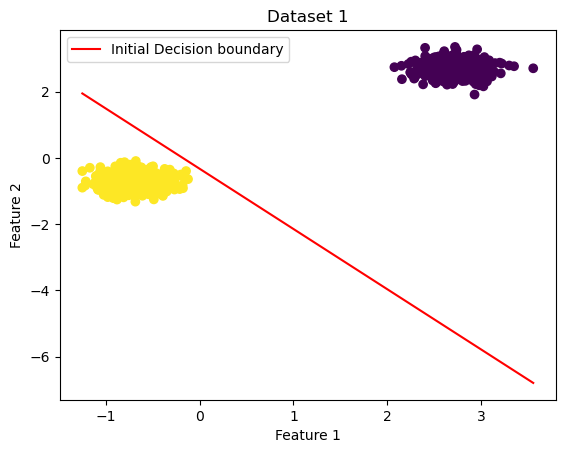

1) Early Stop at Epoch No.: 1
Number of update occurs:  2


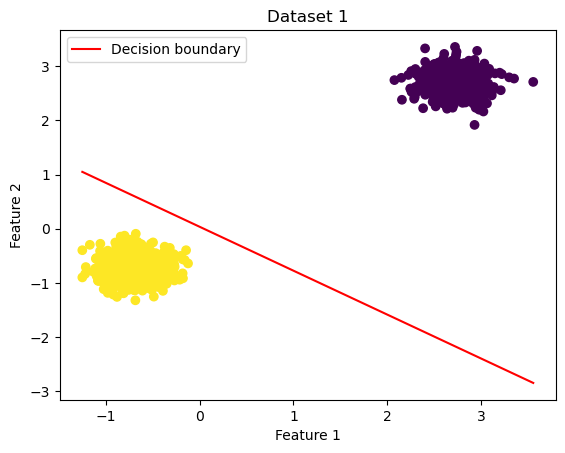

2) Early Stop at Epoch No.: 1
Number of update occurs:  1
3) Early Stop at Epoch No.: 1
Number of update occurs:  1
4) Early Stop at Epoch No.: 1
Number of update occurs:  2
5) Early Stop at Epoch No.: 1
Number of update occurs:  2
avg number of updates occurs for fully converged model is  1.6



Dataset 2, gamma = 1.4



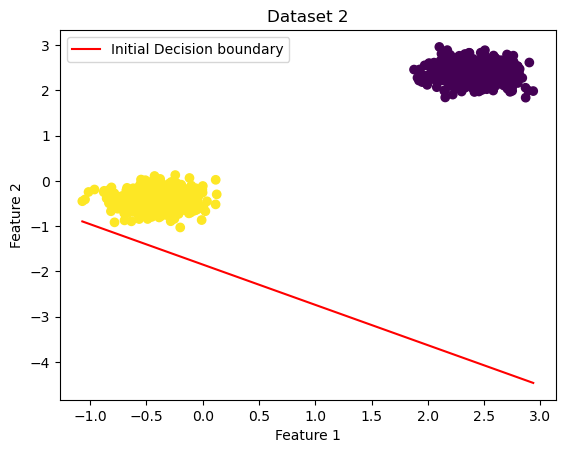

1) Early Stop at Epoch No.: 1
Number of update occurs:  2


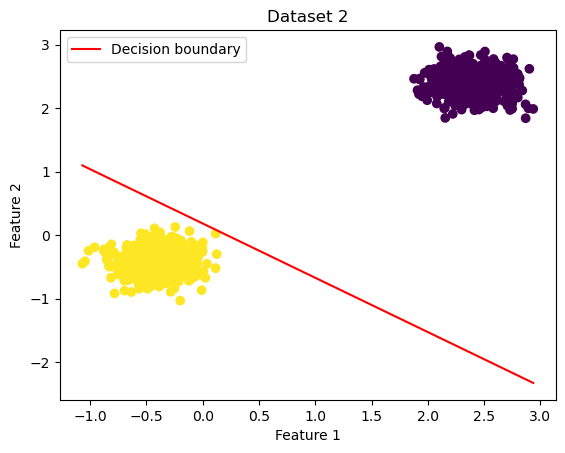

2) Early Stop at Epoch No.: 1
Number of update occurs:  3
3) Early Stop at Epoch No.: 1
Number of update occurs:  2
4) Early Stop at Epoch No.: 1
Number of update occurs:  2
5) Early Stop at Epoch No.: 1
Number of update occurs:  2
avg number of updates occurs for fully converged model is  2.2



Dataset 3, gamma = 1.1



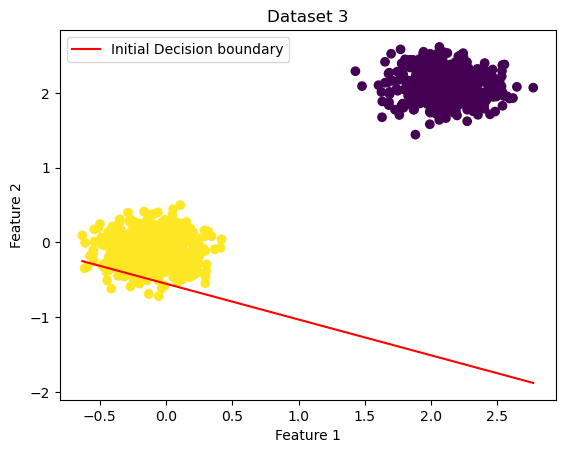

1) Early Stop at Epoch No.: 1
Number of update occurs:  3


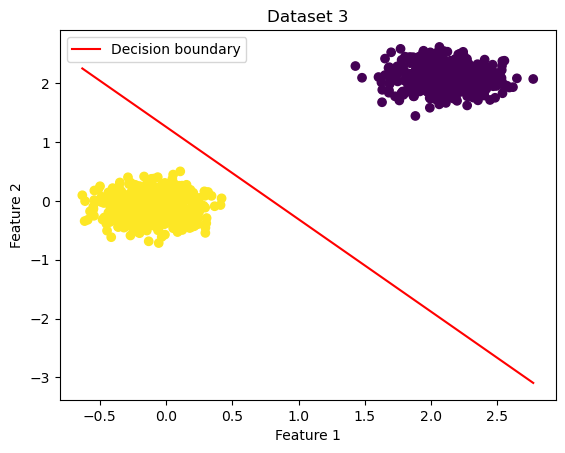

2) Early Stop at Epoch No.: 1
Number of update occurs:  3
3) Early Stop at Epoch No.: 1
Number of update occurs:  3
4) Early Stop at Epoch No.: 1
Number of update occurs:  3
5) Early Stop at Epoch No.: 1
Number of update occurs:  3
avg number of updates occurs for fully converged model is  3.0



Dataset 4, gamma = 0.8



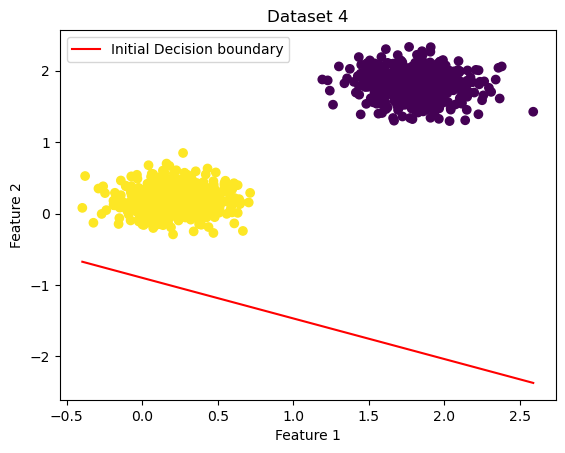

1) Early Stop at Epoch No.: 1
Number of update occurs:  5


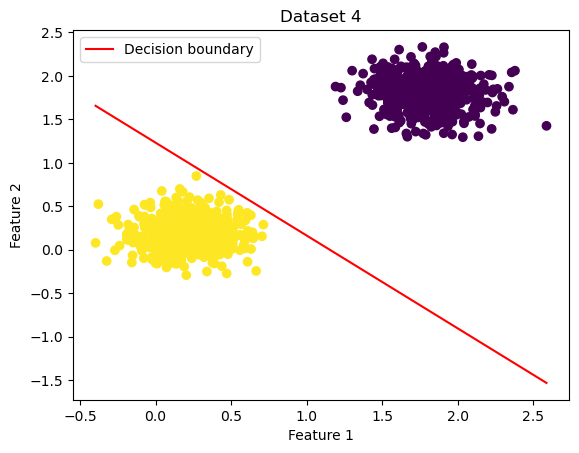

2) Early Stop at Epoch No.: 1
Number of update occurs:  3
3) Early Stop at Epoch No.: 1
Number of update occurs:  3
4) Early Stop at Epoch No.: 1
Number of update occurs:  6
5) Early Stop at Epoch No.: 1
Number of update occurs:  3
avg number of updates occurs for fully converged model is  4.0



Dataset 5, gamma = 0.5



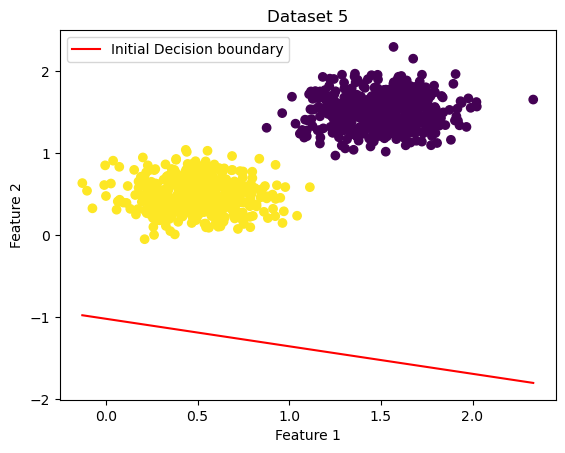

1) Early Stop at Epoch No.: 1
Number of update occurs:  10


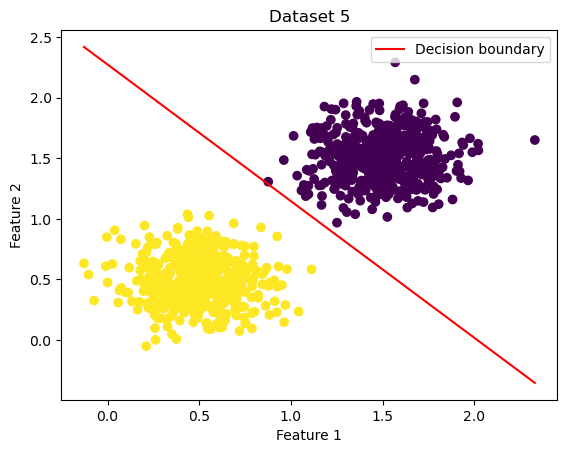

2) Early Stop at Epoch No.: 1
Number of update occurs:  13
3) Early Stop at Epoch No.: 1
Number of update occurs:  6
4) Early Stop at Epoch No.: 1
Number of update occurs:  6
5) Early Stop at Epoch No.: 1
Number of update occurs:  13
avg number of updates occurs for fully converged model is  9.6




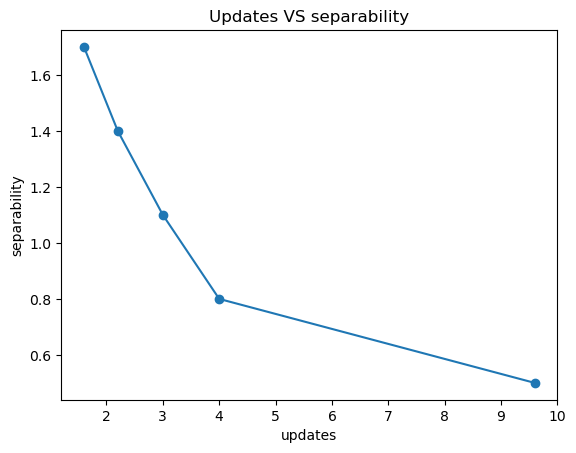

In [7]:
# Generating a list of gamma values
listOfGamma = [2-(0.3*(i+1)) for i in range(5)]

listOfChangeSeparability =list()

count =1

# Iterating over different gamma values
for gamma in listOfGamma:

    X,Y =generateDataset(1-gamma,1+gamma,0.20,1000)

    totalUpdates=0

    print()
    print(f"Dataset {count}, gamma = {gamma}")
    print()

    # Running the perceptron algorithm on the current dataset for multiple runs
    for i in range(5):

        # Initializing random weights for the perceptron and bias term is included
        w = np.random.rand(X.shape[1])

        if(i==0):
            msgs = [f"Dataset {count}","Initial Decision boundary"]
            printGraph(X,Y,w,msgs)

        print(f"{i+1}) ",end="")

        # Training the perceptron and getting the updated weights and number of updates
        w,updates= perceptron(X,Y,w,1000)

        if(i==0):
            msgs = [f"Dataset {count}","Decision boundary"]
            printGraph(X,Y,w,msgs)

        totalUpdates+=updates

    print("avg number of updates occurs for fully converged model is ",totalUpdates/5)

    print()
    print()

    # Storing results for later visualization
    listOfChangeSeparability.append([totalUpdates/5,gamma])
    count+=1

plotUpdateSeparability(listOfChangeSeparability)

### Observation
#### Here we can observe that using the Updates VS separability plot when gamma value is decrease then no of updates are increase

# Q2
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our
classroom discussion on the desirable properties of a loss function. You may implement the an-
alytical way of finding gradient for it. You may implement the basic version of gradient descent
update equation. Plot the dataset before and after training (with the classifier).

Cross-entropy loss

In [8]:
def crossEntropy(y,yPred):
    y=np.squeeze(y)
    epsilon = 1e-5
    return -((y * np.log(yPred+epsilon)) + ((1 - y) * (np.log(1 - yPred+epsilon))))

Derivative of the cross-entropy

In [9]:
def derivativeOfCrossEntropy(x,y,yPred):
    return np.dot(x.T,(yPred - np.squeeze(y)))

Sigmoid activation function

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Gradient  computation

In [11]:
def gradientDescent(X, Y,w, Epoch, learningRate):
    count = 0;
    prevLoss = 10e10
     
    for e in range(Epoch):
        yPred = sigmoid(X.dot(w))

        # Calculate the current cross-entropy loss
        
        currentLoss  = np.mean(crossEntropy(Y,yPred))

        # Calculate the current derivative of cross-entropy loss
        derivativeOfLoss= derivativeOfCrossEntropy(X,Y,yPred)/X.shape[0]

        # Update weights using gradient descent
        w = w - learningRate * derivativeOfLoss

        if(abs(prevLoss - currentLoss) <= 0.0001):
            print("Number of epochs taken to converge : %d"%count)
            return w;
    
        # Print loss at every 100 iterations for monitoring
        if(e%100==0):
            print("Iteration:",count,"Loss:",currentLoss)

        count+=1
        prevLoss = currentLoss 

    print("Not fully converge [MAX] : %d"%count)
    return w

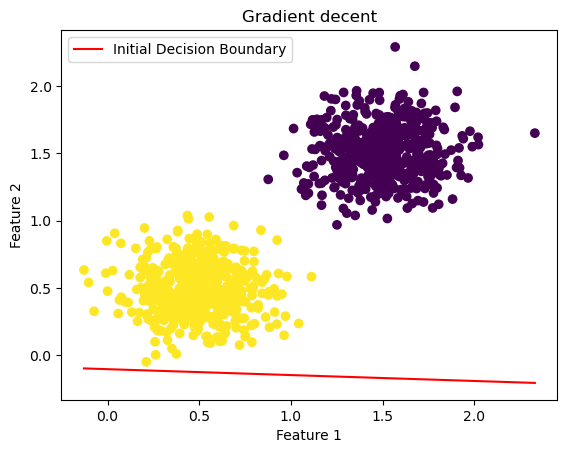

Iteration: 0 Loss: 1.0675323362093116
Iteration: 100 Loss: 0.42101858795019026
Iteration: 200 Loss: 0.29209416529604104
Iteration: 300 Loss: 0.22149846836396858
Iteration: 400 Loss: 0.17815054211892065
Iteration: 500 Loss: 0.14914011420052306
Iteration: 600 Loss: 0.12845706241031707
Iteration: 700 Loss: 0.11299553587237614
Iteration: 800 Loss: 0.10100856697076592
Number of epochs taken to converge : 829


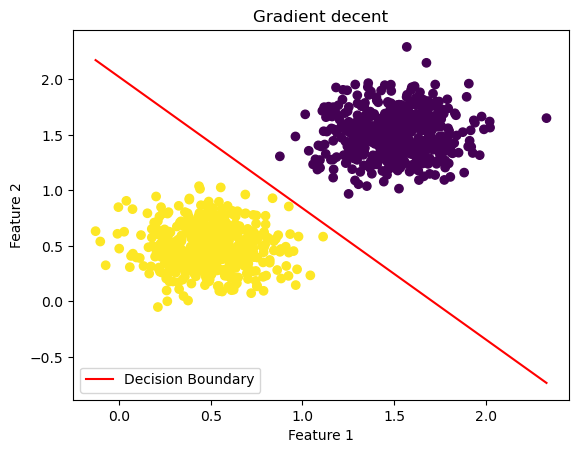

In [12]:
learningRate = 0.1
Epochs = 5000

# Change label -1 to 0 for cross entropy loss
Y[Y == -1] = 0

# Initializing random weights for the perceptron, including the bias term
w = np.random.rand(X.shape[1])

msgs = ["Gradient decent","Initial Decision Boundary"]
printGraph(X,Y,w,msgs)

# Training the gradient descent and getting the updated weights
w = gradientDescent(X,Y,w,Epochs,learningRate)
msgs = ["Gradient decent","Decision Boundary"]

printGraph(X,Y,w,msgs)


# Q3
Consider a binary classification dataset that is not linearly separable in 2D
(e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP)
with a single hidden layer for classifying the same. You may use the loss function used in problem
2. You have to implement the backpropagation algorithm yourself.

In [13]:
def printGraph(X, Y,msg):
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), marker='o')
    plt.title(msg)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

Non-linear Dataset

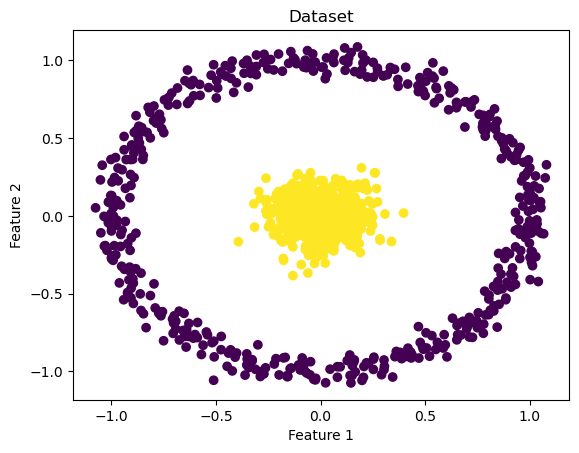

In [14]:
# Generate the non-linear circle synthetic dataset
def generateDataset():
     
     # Generate points for the inner circle
     theta_inner = np.linspace(0, 2*np.pi, 500)
     x_inner_1 = 0.1 * np.cos(theta_inner)
     x_inner_2 = 0.1 * np.sin(theta_inner)
     inner_circle = np.column_stack((x_inner_1, x_inner_2))

     # Generate points for the outer circle
     theta_outer = np.linspace(0, 2*np.pi, 500)
     x_outer_1 = np.cos(theta_outer)
     x_outer_2 = np.sin(theta_outer)
     outer_circle = np.column_stack((x_outer_1, x_outer_2))
     
     # Add noise to dataset
     inner_circle += 0.1 * np.random.randn(*inner_circle.shape)
     outer_circle += 0.05 * np.random.randn(*outer_circle.shape)

     x = np.ones((1000, 2))
     x[::2, :2] = inner_circle
     x[1::2, :2] = outer_circle

     # Initialize the output labels
     y= np.empty((1000, 1))
     y[::2,:1] = 1
     y[1::2,:1] = 0

     return x,y

X,Y = generateDataset()
printGraph(X,Y,"Dataset")

Sigmoid activation function

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Derivative of sigmoid activation function

In [16]:
def derivativeOfSigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

Cross entropy loss function

In [17]:
def crossEntropy(y,yPred):
    epsilon = 1e-10
    return -((y * np.log(yPred+epsilon)) + ((1 - y) * (np.log(1 - yPred+epsilon))))

MLP

In [18]:
def MLP(X, Y, Epoch, learningRate,wHiddenLayer,bHiddenLayer,wOutputLayer,bOutputLayer):
    
    count = 1;

    for e in range(Epoch):

        ################################
        ####### Forward pass ########### 

        H_hiddenInput = np.dot(X,wHiddenLayer)+bHiddenLayer
        H_hiddenOutput = sigmoid(H_hiddenInput)

        yPred = sigmoid(np.dot(H_hiddenOutput,wOutputLayer)+bOutputLayer)

        ################################
        ####### Calculate loss #########

        # Calculate current cross-entropy loss
        currentLoss = np.mean(crossEntropy(Y,yPred))

        ################################
        ######### Backward pass#########

        dOutputLayer = Y- yPred 
        dHiddenLayer = np.dot(dOutputLayer,wOutputLayer.T)*derivativeOfSigmoid(H_hiddenInput)

        ################################
        ###### Update parameters #######

        # Update weights and biases of output layer
        wOutputLayer+=learningRate*np.dot(H_hiddenOutput.T,dOutputLayer)
        bOutputLayer+=learningRate*np.sum(dOutputLayer, axis=0, keepdims=True)

        # Update weights and biases of hidden layer
        wHiddenLayer += learningRate * np.dot(X.T,dHiddenLayer)
        bHiddenLayer += learningRate * np.sum(dHiddenLayer, axis=0, keepdims=True)
        
        ################################
        ################################

        # Print loss at every 100 iterations for monitoring
        if(e%100==0):
            print("Iteration:",count,"Loss:",currentLoss)

        count+=1

    return wHiddenLayer,bHiddenLayer,wOutputLayer,bOutputLayer

MLP architecture

In [19]:
# Define MLP architecture
inputLayer = X.shape[1]
hiddenLayer = 4
outputLayer = 1
learningRate = 0.01
Epoch=5000

Initialization of parameters

In [20]:
# Initialize random weights and biases for hidden and output layers
wHiddenLayer = np.random.rand(inputLayer,hiddenLayer)   
bHiddenLayer = np.zeros((1, hiddenLayer))   
wOutputLayer = np.random.rand(hiddenLayer,outputLayer)       
bOutputLayer = np.zeros((1,outputLayer))

Prediction of Dataset without training of MLP model 

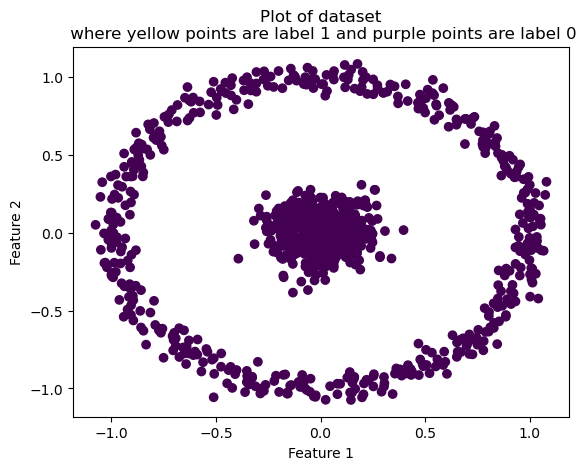

In [21]:
# Perform the prediction on training data without training the MLP model
H_hiddenInput = np.dot(X,wHiddenLayer)+bHiddenLayer
H_hiddenOutput = sigmoid(H_hiddenInput)
yPred = sigmoid(np.dot(H_hiddenOutput,wOutputLayer)+bOutputLayer)

# Threshold the predictions
yPred[yPred>0.5] = 1
yPred[yPred<=0.5] = 0

# Plot the graph of data-points are predicted by the MLP 
printGraph(X,yPred,"Plot of dataset\n where yellow points are label 1 and purple points are label 0")

Training of the model

In [22]:

# Training the MLP and getting the updated weights and biases
wHiddenLayer,bHiddenLayer,wOutputLayer,bOutputLayer= MLP(X,Y.reshape(-1, 1),Epoch,learningRate,wHiddenLayer,bHiddenLayer,wOutputLayer,bOutputLayer)


Iteration: 1 Loss: 0.8332709078617971
Iteration: 101 Loss: 1.0495760274469594
Iteration: 201 Loss: 1.0467933519616501
Iteration: 301 Loss: 0.5568360365722035
Iteration: 401 Loss: 0.5380210607326872
Iteration: 501 Loss: 0.2689655350208476


Iteration: 601 Loss: 0.2575484208338367
Iteration: 701 Loss: 0.2566344357505076
Iteration: 801 Loss: 0.25613261962156053
Iteration: 901 Loss: 0.2538966990136
Iteration: 1001 Loss: 0.24647342882012938
Iteration: 1101 Loss: 0.021289780731363117
Iteration: 1201 Loss: 0.010424941484925164
Iteration: 1301 Loss: 0.007020577333503354
Iteration: 1401 Loss: 0.005318369067177078
Iteration: 1501 Loss: 0.004288427675238826
Iteration: 1601 Loss: 0.003595785240653357
Iteration: 1701 Loss: 0.0030972618909614054
Iteration: 1801 Loss: 0.002720965231731775
Iteration: 1901 Loss: 0.0024267077346378243
Iteration: 2001 Loss: 0.002190221922114323
Iteration: 2101 Loss: 0.0019959713997077916
Iteration: 2201 Loss: 0.0018335416857772416
Iteration: 2301 Loss: 0.001695687329398009
Iteration: 2401 Loss: 0.0015772103551168171
Iteration: 2501 Loss: 0.0014742840354275348
Iteration: 2601 Loss: 0.0013840282979371383
Iteration: 2701 Loss: 0.0013042338124231068
Iteration: 2801 Loss: 0.0012331773243330045
Iteration: 2901 L

Prediction after training MLP

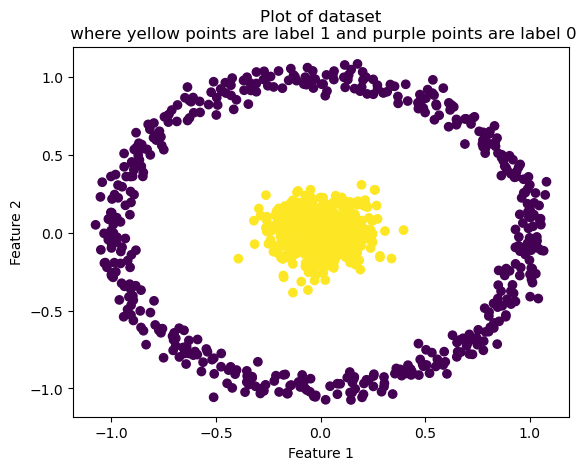

In [23]:
# Perform the prediction on training data
H_hiddenInput = np.dot(X,wHiddenLayer)+bHiddenLayer
H_hiddenOutput = sigmoid(H_hiddenInput)
yPred = sigmoid(np.dot(H_hiddenOutput,wOutputLayer)+bOutputLayer)

# Threshold the predictions
yPred[yPred>0.5] = 1
yPred[yPred<=0.5] = 0

# Plot the graph of data-points are predicted by the MLP 
printGraph(X,yPred,"Plot of dataset\n where yellow points are label 1 and purple points are label 0")